In [1]:
!pip install nplocate >/dev/null
import numpy as np
import trackpy as tp
import nplocate as nl
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
tiff_img = Image.open("deconvolutionseriesDec19-Mar20.lif - 0_45-newnewgood2-1.tif")
img = []
for z in range(tiff_img.n_frames):
    tiff_img.seek(z)
    data = tiff_img.convert('L')
    img.append(np.array(data))
img = np.array(img)
img = np.moveaxis(img, 0, -1)
img = nl.fix_intensity(img)
print(img.shape)

(512, 512, 135)


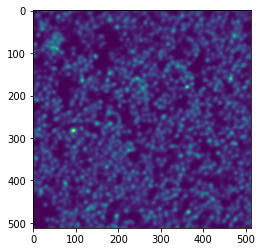

In [6]:
plt.imshow(img[:, :, 50])

In [3]:
diameter = 11
xyz = tp.locate(img, diameter=diameter)
xyz = np.array(xyz)[:, :3]
xyz_tp = xyz.copy()

In [4]:
should_add = True
while should_add:
    n0 = xyz.shape[0]
    xyz = nl.add(
        positions=xyz,
        image=img,
        r_model=diameter * 2,
        diameter=diameter,
        locate_func=lambda im : np.array(tp.locate(im, diameter))[:, :3],
        threshold=20
    )
    n1 = xyz.shape[0]
    should_add = n1 > n0
    print(n0, '-->', n1)
xyz = nl.refine(xyz, img, diameter * 2, diameter)
xyz.shape, xyz_tp.shape

3544 --> 4288
4288 --> 4384
4384 --> 4391
4391 --> 4394
4394 --> 4394


((4320, 3), (3544, 3))

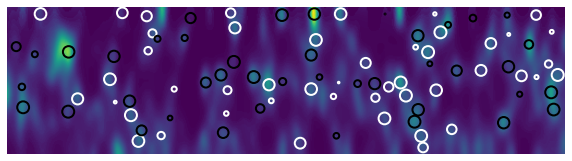

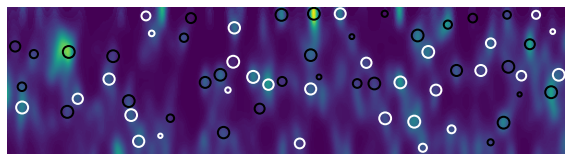

In [5]:
s = 90
axis = 0

nl.see_slice(img, xyz, s, 5.5, axis, sizes=(10, 10))
nl.see_slice(img, xyz_tp, s, 5.5, axis, sizes=(10, 10))

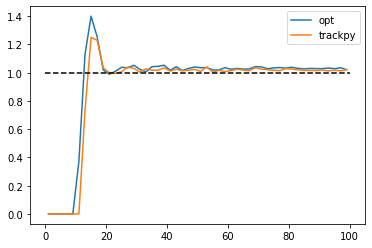

In [6]:
plt.plot(*nl.get_gr(xyz, 100, 51), label="opt")
plt.plot(*nl.get_gr(xyz_tp, 100, 51), label="trackpy")
plt.plot((0, 100), (1, 1), color='k', ls='--')
plt.legend()
plt.show()

In [23]:
nl.save_xyz('trackpy.xyz', [xyz_tp])
nl.save_xyz('nplocate.xyz', [xyz])